Run the following code before running this script

0.1_get_bvalues.ipynb

0.2_extract_data.ipynb

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score

#
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten, Dense


from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
#from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from scikeras.wrappers import KerasRegressor
from sklearn.ensemble import AdaBoostRegressor

import pickle

# Load prepared data

In [3]:
dir_path = "/Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/"
# dir_path = "/Users/mriworkshop/Documents/TDCS/code/tdcs_thesis/"
save_path = dir_path+"data/raw/"
img_path =  dir_path+"data/processed/"
model_path = dir_path+"models/"

## fmap mean all experiments

In [4]:
file_mean = save_path+"fmap_mean_39_2.txt"
columns_mean =['exp', 'mini_exp', 'i', 'j', 'k', 'mean0', 'mean1', 'mean2', 'mean3', 'mean4', 'theory']
data = np.loadtxt(file_mean);

In [5]:
df = pd.DataFrame(data, columns=columns_mean)
df = df.astype({"exp": int, "i": int, "j": int, "k": int, "mini_exp": int})
df

,exp,mini_exp,i,j,k,mean0,mean1,mean2,mean3,mean4,theory
0,39,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,39,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0
2,39,1,0,0,2,0.0,0.0,0.0,0.0,0.0,0.0
3,39,1,0,0,3,0.0,0.0,0.0,0.0,0.0,0.0
4,39,1,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1081339,39,6,43,63,59,0.0,0.0,0.0,0.0,0.0,0.0
1081340,39,6,43,63,60,0.0,0.0,0.0,0.0,0.0,0.0
1081341,39,6,43,63,61,0.0,0.0,0.0,0.0,0.0,0.0
1081342,39,6,43,63,62,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1081344 entries, 0 to 1081343
Data columns (total 11 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   exp       1081344 non-null  int64  
 1   mini_exp  1081344 non-null  int64  
 2   i         1081344 non-null  int64  
 3   j         1081344 non-null  int64  
 4   k         1081344 non-null  int64  
 5   mean0     1081344 non-null  float64
 6   mean1     1081344 non-null  float64
 7   mean2     1081344 non-null  float64
 8   mean3     1081344 non-null  float64
 9   mean4     1081344 non-null  float64
 10  theory    1081344 non-null  float64
dtypes: float64(6), int64(5)
memory usage: 90.8 MB


# Split data

## Get one experiment

In [7]:
df_test1 = df[(df['exp']==39) & (df['mini_exp']==1)]
df_test2 = df[(df['exp']==39) & (df['mini_exp']==4)]
df_test3 = df[(df['exp']==39) & (df['mini_exp']==6)]

In [8]:
print(df_test1.shape)
print(df_test2.shape)
print(df_test3.shape)

(180224, 11)
(180224, 11)
(180224, 11)


## None zero

In [9]:
df_nonzero = df[(df['mean0']!=0.0) & (df['mean1']!=0.0) & (df['mean2']!=0.0) & (df['mean3']!=0.0) & (df['mean4']!=0.0)]

In [10]:
df_nonzero

,exp,mini_exp,i,j,k,mean0,mean1,mean2,mean3,mean4,theory
26772,39,1,6,34,20,-1081.614990,-1080.819214,-1106.585571,-1124.238770,-1119.958618,4.285640
26774,39,1,6,34,22,-783.941284,-787.986328,-818.741089,-835.996887,-802.756470,4.994972
26776,39,1,6,34,24,-511.714417,-487.598206,-550.717896,-554.503784,-528.473389,5.870188
26777,39,1,6,34,25,-316.738281,-280.300812,-335.104797,-381.397308,-327.693420,6.393743
26778,39,1,6,34,26,-210.116745,-190.779648,-263.173798,-275.293640,-220.804657,6.995137
...,...,...,...,...,...,...,...,...,...,...,...
1050976,39,6,36,37,32,521.188354,513.651672,515.168457,516.990173,510.742615,-0.232876
1050977,39,6,36,37,33,620.182007,639.036682,620.068970,602.726990,621.597656,3.468895
1050978,39,6,36,37,34,552.389282,560.708862,550.782410,549.108154,549.562561,3.697875
1050979,39,6,36,37,35,558.650024,572.162537,560.633911,552.402222,560.008301,3.526700


In [11]:
df4_pred1 =  df_nonzero[(df_nonzero['exp']==39) & (df_nonzero['mini_exp']==1)]
df4_pred2 =  df_nonzero[(df_nonzero['exp']==39) & (df_nonzero['mini_exp']==4)]
df4_pred3 =  df_nonzero[(df_nonzero['exp']==39) & (df_nonzero['mini_exp']==6)]

In [12]:
X4_pred1 = df4_pred1.iloc[:, 5:-1].values
y4_pred1 = df4_pred1['theory'].values

X4_pred2 = df4_pred2.iloc[:, 5:-1].values
y4_pred2 = df4_pred2['theory'].values

X4_pred3 = df4_pred3.iloc[:, 5:-1].values
y4_pred3 = df4_pred3['theory'].values

In [13]:
print(X4_pred1.shape)
print(y4_pred1.shape)
print(X4_pred2.shape)
print(y4_pred2.shape)
print(X4_pred3.shape)
print(y4_pred3.shape)

(35266, 5)
(35266,)
(35271, 5)
(35271,)
(35272, 5)
(35272,)


## Load model

In [14]:
file = model_path+'model_nonzero_32to38_3layer5unit_300.sav'
model = pickle.load(open(file, 'rb'))

2023-01-17 21:51:30.263255: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Predict

In [29]:
df_test = df_test3
df_pred = df4_pred3

In [30]:
X_test = X4_pred3
y_test = y4_pred3

In [31]:
result = model.evaluate(X_test, y_test)
print(result)

1103/1103 [==============================] - 1s 813us/step - loss: 404.1637 - accuracy: 2.8351e-05
[404.1637268066406, 2.8351099899737164e-05]


In [32]:
test_pred = model.predict(X_test)
print(mse(test_pred, y_test))
print(mape(test_pred, y_test))

1103/1103 [==============================] - 1s 710us/step
404.1637961036147
0.4029811381679237


In [33]:
np.corrcoef(test_pred.flatten(), y_test)

array([[1.        , 0.18448391],
       [0.18448391, 1.        ]])

# Plot

### Theory vs Predict

r: 0.18448, st_er: 0.001498
y = 0.0528*x + 6.7803


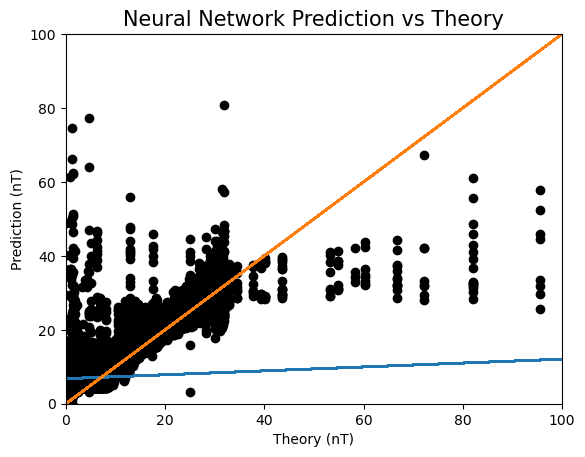

In [34]:
x = y_test.flatten()
y = test_pred.flatten()
m, b, r, p, st_er = stats.linregress(x,y) 

yfit = [b + m * xi for xi in x]
yisx = [0 + 1 * xi for xi in x]
plt.plot(x, yfit)
plt.plot(x, yisx)

plt.scatter(y_test, test_pred,  color='black')
plt.axis([0,100, 0, 100])
plt.xlabel("Theory (nT)")
plt.ylabel("Prediction (nT)")
plt.title("Neural Network Prediction vs Theory", fontsize=15)
# print(r, st_er)
print("r: {:.5f}, st_er: {:.6f}".format(r, st_er))
print("y = "+str(round(m,4))+"*x + "+str(round(b,4)))

# Output data

In [35]:
test_pred = model.predict(X4_pred3)

1103/1103 [==============================] - 1s 758us/step


In [36]:
df_pred['predict'] = test_pred

/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_33342/255584968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred['predict'] = test_pred


In [37]:
df_test['predict'] = 0.00

/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_33342/3257651465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predict'] = 0.00


In [38]:
df_out = df_test[['i', 'j', 'k', 'predict']]
df_pre = df_pred[['i', 'j', 'k', 'predict']]

In [39]:
for x in range(len(df_pre)):
    i = df_pre.iloc[x, :]['i'].astype(int)
    j = df_pre.iloc[x, :]['j'].astype(int)
    k = df_pre.iloc[x, :]['k'].astype(int)
    pred = df_pre.iloc[x, :]['predict']
    idx = df_out[(df_out['i']==i) & (df_out['j']==j) & (df_out['k']==k)].index
    df_out.loc[idx, 'predict']= pred

In [40]:
df_out

,i,j,k,predict
901120,0,0,0,0.0
901121,0,0,1,0.0
901122,0,0,2,0.0
901123,0,0,3,0.0
901124,0,0,4,0.0
...,...,...,...,...
1081339,43,63,59,0.0
1081340,43,63,60,0.0
1081341,43,63,61,0.0
1081342,43,63,62,0.0


In [41]:
np.savetxt(img_path+"nn_nonzero_39_predict6_2.txt", df_out[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")